# Launch Turi Create

In [1]:
import turicreate

# Load house sales data

In [2]:
sales = turicreate.SFrame('home_data.sframe/')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore

In [4]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

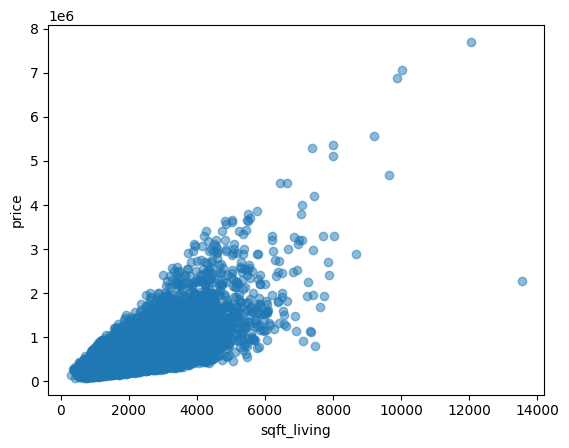

In [5]:
# plot the first 5000 entries of the data
# turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])
# using matplotlib
import matplotlib.pyplot as plt
plt.scatter(sales['sqft_living'], sales['price'], alpha=0.5)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

# Simple regression model that predicts price from square feet

In [6]:
training_set, test_set = sales.random_split(.8, seed=0)

## train simple regression model

In [7]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.006386     | 4285872.892465     | 4358391.013780       | 262097.444545                   | 278542.467127                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [8]:
print (test_set['price'].mean())

543054.0425632538


In [9]:
print (sqft_model.evaluate(test_set))

{'max_error': 4150535.7192330672, 'rmse': 255175.2418008752}


# Explore model a little further

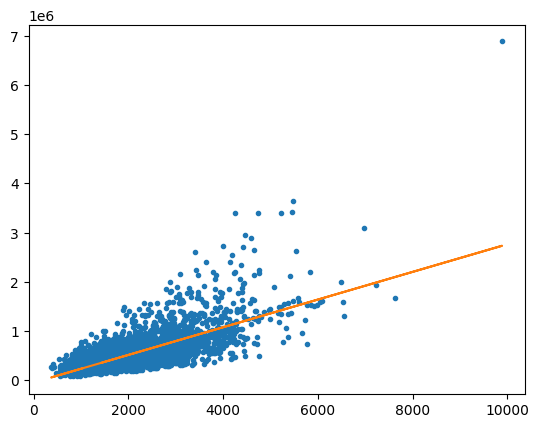

In [10]:
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

In [11]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-45471.43077734311,5042.982801616658
sqft_living,None,281.08551178405213,2.2166619058584986


# Explore other features of the data

In [12]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [13]:
sales[my_features].show()

Materializing SFrame

In [17]:
turicreate.show(sales['zipcode'],sales['price'])
# import plotly.express as px

# fig = px.scatter(sales, x='zipcode', y='price', opacity=0.5)
# fig.show()

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [ ]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

# Compare simple model with more complex one

In [ ]:
print (my_features)

In [ ]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

# Apply learned models to make predictions

In [2]:
house1 = sales[sales['id']=='5309101200']

NameError: name 'sales' is not defined

In [1]:
house1

NameError: name 'house1' is not defined

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [ ]:
print (house1['price'])

In [ ]:
print (sqft_model.predict(house1))

In [ ]:
print (my_features_model.predict(house1))

## Prediction for a second house, a fancier one

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [ ]:
print (house2['price'])

In [ ]:
print (sqft_model.predict(house2))

In [ ]:
print (my_features_model.predict(house2))

## Prediction for a super fancy home

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}
gates_house = turicreate.SFrame(bill_gates)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [ ]:
print (sqft_model.predict(gates_house))

In [ ]:
print (my_features_model.predict(gates_house))